In [58]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import datasets,preprocessing
from sklearn.cluster import  KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
churn_data = pd.read_csv("wa-fnusec-telcocustomerchurn.zip")
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
churn_data = churn_data.drop('customerID',axis=1)

In [6]:
churn_data['TotalCharges'].value_counts()

20.2       11
           11
19.75       9
19.65       8
20.05       8
19.9        8
45.3        7
19.55       7
20.15       6
20.25       6
19.45       6
20.3        5
20.45       5
69.9        4
69.65       4
19.5        4
69.6        4
70.6        4
19.2        4
44.4        4
49.9        4
75.3        4
20.5        4
20.35       4
69.95       4
19.95       4
19.4        4
20.4        4
50.15       4
74.7        4
           ..
5730.15     1
613.95      1
373         1
7746.7      1
5746.15     1
1208.35     1
394.85      1
6431.05     1
2293.6      1
2684.35     1
7082.85     1
2751        1
2936.25     1
1217.25     1
970.45      1
1054.75     1
4331.4      1
3994.45     1
5688.45     1
1893.5      1
515.45      1
1301.1      1
962.25      1
955.75      1
1816.2      1
72.4        1
1948.35     1
587.45      1
4322.85     1
941         1
Name: TotalCharges, Length: 6531, dtype: int64

In [7]:
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'],errors='coerce')#converting the missing value to NUll
churn_data['TotalCharges'].fillna(churn_data['TotalCharges'].median(),inplace=True)   # replacing null with median

In [8]:
churn_data['TotalCharges'].value_counts()

1397.475    11
20.200      11
19.750       9
19.650       8
20.050       8
19.900       8
19.550       7
45.300       7
19.450       6
20.150       6
20.250       6
20.450       5
20.300       5
19.950       4
19.850       4
19.500       4
20.400       4
20.350       4
20.500       4
44.400       4
69.650       4
19.200       4
69.950       4
70.600       4
69.900       4
69.600       4
44.000       4
50.150       4
49.900       4
19.400       4
            ..
914.300      1
7382.250     1
1971.150     1
1793.250     1
1212.850     1
1673.800     1
2688.450     1
7171.700     1
4483.950     1
4166.350     1
1968.100     1
7610.100     1
92.050       1
2666.750     1
1001.500     1
7262.000     1
4740.000     1
96.450       1
5574.750     1
8333.950     1
958.150      1
44.650       1
1374.350     1
3107.300     1
248.950      1
607.300      1
1534.050     1
1066.150     1
249.950      1
1024.000     1
Name: TotalCharges, Length: 6531, dtype: int64

In [9]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


In [10]:
churn_objdata = churn_data.select_dtypes(include='object')

In [11]:
churn_objdata

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
5,Female,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes
6,Male,No,Yes,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),No
7,Female,No,No,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,No
8,Female,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,Yes
9,Male,No,Yes,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),No


In [12]:
churn_numdata = churn_data.select_dtypes(include=['int64','float64'])

In [13]:
churn_numdata

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
5,0,8,99.65,820.50
6,0,22,89.10,1949.40
7,0,10,29.75,301.90
8,0,28,104.80,3046.05
9,0,62,56.15,3487.95


In [14]:
from sklearn.preprocessing import LabelEncoder ,StandardScaler
churn_objdata=churn_objdata.apply(LabelEncoder().fit_transform)

In [15]:
churn_objdata

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
5,0,0,0,1,2,1,0,0,2,0,2,2,0,1,2,1
6,1,0,1,1,2,1,0,2,0,0,2,0,0,1,1,0
7,0,0,0,0,1,0,2,0,0,0,0,0,0,0,3,0
8,0,1,0,1,2,1,0,0,2,2,2,2,0,1,2,1
9,1,0,1,1,0,0,2,2,0,0,0,0,1,0,0,0


In [16]:
lis_num = ['tenure','MonthlyCharges','TotalCharges']
Sc=StandardScaler()
for i in lis_num:
    churn_numdata[i+'_norm'] = Sc.fit_transform(np.array(churn_numdata[i]).reshape(-1,1))

In [17]:
churn_numdata.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,tenure_norm,MonthlyCharges_norm,TotalCharges_norm
0,0,1,29.85,29.85,-1.277445,-1.160323,-0.994242
1,0,34,56.95,1889.50,0.066327,-0.259629,-0.173244
2,0,2,53.85,108.15,-1.236724,-0.362660,-0.959674
3,0,45,42.30,1840.75,0.514251,-0.746535,-0.194766
4,0,2,70.70,151.65,-1.236724,0.197365,-0.940470


In [18]:
churn_numdata.drop(['tenure','MonthlyCharges','TotalCharges'],axis=1,inplace=True)

In [19]:
final_data = pd.concat([churn_numdata,churn_objdata],axis=1)

In [20]:
final_data

,SeniorCitizen,tenure_norm,MonthlyCharges_norm,TotalCharges_norm,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,-1.277445,-1.160323,-0.994242,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0,0.066327,-0.259629,-0.173244,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0,-1.236724,-0.362660,-0.959674,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0,0.514251,-0.746535,-0.194766,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,-1.236724,0.197365,-0.940470,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
5,0,-0.992402,1.159546,-0.645186,0,0,0,1,2,1,0,0,2,0,2,2,0,1,2,1
6,0,-0.422317,0.808907,-0.146799,1,0,1,1,2,1,0,2,0,0,2,0,0,1,1,0
7,0,-0.910961,-1.163647,-0.874137,0,0,0,0,1,0,2,0,0,0,0,0,0,0,3,0
8,0,-0.177995,1.330711,0.337349,0,1,0,1,2,1,0,0,2,2,2,2,0,1,2,1
9,0,1.206498,-0.286218,0.532439,1,0,1,1,0,0,2,2,0,0,0,0,1,0,0,0


#  Unsupervised

In [21]:
data_unsup = final_data.drop('Churn',axis=1)
data_unsup.head()

,SeniorCitizen,tenure_norm,MonthlyCharges_norm,TotalCharges_norm,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,-1.277445,-1.160323,-0.994242,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2
1,0,0.066327,-0.259629,-0.173244,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,0,-1.236724,-0.362660,-0.959674,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3
3,0,0.514251,-0.746535,-0.194766,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,0,-1.236724,0.197365,-0.940470,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2


# KMean

In [22]:
cluster_range = range(1,10)
cluster_errors=[]

for num in cluster_range:
    clusters=KMeans(num)
    clusters.fit(data_unsup)
    cluster_errors.append(clusters.inertia_)

In [23]:
clusters_df =pd.DataFrame({"num_clusters":cluster_range,"cluster_error":cluster_errors})
clusters_df

,num_clusters,cluster_error
0,1,84871.833736
1,2,66642.430082
2,3,58999.949627
3,4,54843.250259
4,5,51759.977895
5,6,49217.851820
6,7,47457.721541
7,8,45995.716003
8,9,44827.941043


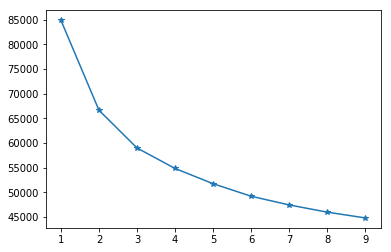

In [24]:
plt.plot(clusters_df.num_clusters,clusters_df.cluster_error,marker='*')
plt.show()

In [25]:
kmean=KMeans(2)

In [26]:
kmean.fit(data_unsup)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [27]:
kmean_target=kmean.predict(data_unsup)

In [28]:
kmean_unsup=data_unsup.copy()
kmean_unsup['target']=kmean_target

In [29]:
metrics.confusion_matrix(kmean_unsup.target,final_data.Churn)

array([[2204,  392],
       [2970, 1477]], dtype=int64)

In [30]:
metrics.accuracy_score(kmean_unsup.target,final_data.Churn)

0.5226465994604572

# Agglomerative Clustering

In [31]:
Agglo = AgglomerativeClustering(2)

In [32]:
Agglo.fit(data_unsup)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func='deprecated')

In [33]:
Agglo_target = Agglo.fit_predict(data_unsup)

In [34]:
Agglo_target

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [35]:
Agglo_unsup=data_unsup.copy()
Agglo_unsup['target']=Agglo_target

In [36]:
metrics.confusion_matrix(Agglo_unsup.target,final_data.Churn)

array([[3186, 1352],
       [1988,  517]], dtype=int64)

In [38]:
metrics.accuracy_score(Agglo_unsup.target,final_data.Churn)

0.5257702683515547

In [39]:
data_unsup['target']=kmean_target

In [40]:
data_unsup.head()

,SeniorCitizen,tenure_norm,MonthlyCharges_norm,TotalCharges_norm,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,target
0,0,-1.277445,-1.160323,-0.994242,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,1
1,0,0.066327,-0.259629,-0.173244,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,1
2,0,-1.236724,-0.362660,-0.959674,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0,0.514251,-0.746535,-0.194766,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,1
4,0,-1.236724,0.197365,-0.940470,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [41]:
X= data_unsup.drop('target',axis=1)

In [42]:
Y=data_unsup['target']

In [43]:
pca=PCA(2)

In [44]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=0)

In [45]:
xtrain_pca = pca.fit_transform(xtrain)

In [46]:
xtest_pca = pca.transform(xtest)

In [59]:
knn=KNeighborsClassifier()
RF=RandomForestClassifier()
NB=GaussianNB()
SVM=SVC()
DT=DecisionTreeClassifier()

In [61]:
unsup_accuracy=[]
for name, model in zip(['KNN','RandomForest','Naive Bayes','SVM','DecisonTree'],
                      [knn,RF,NB,SVM,DT]):
    model.fit(xtrain_pca,ytrain)
    ypred=model.predict(xtest_pca)
    accuracy =metrics.accuracy_score(ypred,ytest)
    unsup_accuracy.append([name,accuracy])
    print("Accuracy of {} model : {}".format(name,accuracy))

Accuracy of KNN model : 0.9943208707998107
Accuracy of RandomForest model : 0.9943208707998107
Accuracy of Naive Bayes model : 0.9886417415996214
Accuracy of SVM model : 0.9914813061997161
Accuracy of DecisonTree model : 0.9919545669663985


# Supervised

In [49]:
X1=final_data.drop('Churn',axis=1)

In [50]:
Y1=final_data['Churn']

In [51]:
xtrain1,xtest1,ytrain1,ytest1 = train_test_split(X1,Y1,test_size=0.3,random_state=0)

In [52]:
xtrain1_pca = pca.fit_transform(xtrain1)

In [53]:
xtest1_pca = pca.transform(xtest1)

In [62]:
sup_accuracy=[]
for name, model in zip(['KNN','RandomForest','Naive Bayes','SVM','DecisonTree'],
                      [knn,RF,NB,SVM,DT]):
    model.fit(xtrain1_pca,ytrain1)
    ypred=model.predict(xtest1_pca)
    accuracy =metrics.accuracy_score(ypred,ytest1)
    sup_accuracy.append([name,accuracy])
    print("Accuracy of {} model : {}".format(name,accuracy))

Accuracy of KNN model : 0.7576904874585897
Accuracy of RandomForest model : 0.7553241836251775
Accuracy of Naive Bayes model : 0.7823000473260767
Accuracy of SVM model : 0.7789872219592996
Accuracy of DecisonTree model : 0.7368670137245622


In [57]:
print('unsupervised')
print(unsup_accuracy)
print('supervised')
print(sup_accuracy)

unsupervised
[['KNN', 0.9943208707998107], ['RandomForest', 0.9943208707998107], ['Logistic_Reg', 0.9924278277330809], ['Naive Bayes', 0.9886417415996214], ['SVM', 0.9914813061997161], ['DecisonTree', 0.9924278277330809]]
supervised
[['KNN', 0.7576904874585897], ['RandomForest', 0.7529578797917653], ['Logistic_Reg', 0.7813535257927118], ['Naive Bayes', 0.7823000473260767], ['SVM', 0.7789872219592996], ['DecisonTree', 0.7321344060577378]]
